In [1]:
import iris

/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
def hemispheric_comparison(variable, model, argo=False):
    """Compare the hemispheres"""
    
    assert variable in ['areacello', 'volcello']
    if variable == 'volcello':
        long_name = 'ocean_volume'
    else:
        long_name = 'cell_area'
    
    if argo:
        nh_subset = lambda cell: 0.0 <= cell <= 60.0
        sh_subset = lambda cell: -60.0 <= cell < 0.0
    else:
        nh_subset = lambda cell: cell >= 0.0
        sh_subset = lambda cell: cell < 0.0
    
    nh_constraint = iris.Constraint(latitude=nh_subset)
    sh_constraint = iris.Constraint(latitude=sh_subset)
    
    infile = '/g/data/ua6/DRSv2/CMIP5/%s/historical/fx/ocean/r0i0p0/%s/latest/%s_fx_%s_historical_r0i0p0.nc' %(model, variable, variable, model)
    globe_cube = iris.load_cube(infile, long_name)
    nh_cube = iris.load_cube(infile, long_name & nh_constraint)
    sh_cube = iris.load_cube(infile, long_name & sh_constraint)
    
    if variable == 'volcello' and argo:
        depth_constraint = iris.Constraint(depth=lambda cell: cell < 2000.0)
        globe_cube = globe_cube.extract(depth_constraint)
        nh_cube = nh_cube.extract(depth_constraint)
        sh_cube = sh_cube.extract(depth_constraint)
        
    globe_sum = globe_cube.data.sum()
    nh_sum = nh_cube.data.sum()
    sh_sum = sh_cube.data.sum()
    
    print(globe_sum, nh_sum, sh_sum, nh_sum + sh_sum)
    
    print(sh_sum / globe_sum)


In [3]:
hemispheric_comparison('volcello', 'CSIRO-Mk3-6-0')

1.3391147e+18 5.454166e+17 7.93698e+17 1.3391146e+18
0.5927035


In [4]:
hemispheric_comparison('volcello', 'CSIRO-Mk3-6-0', argo=True)

6.20361e+17 2.3831488e+17 3.3292247e+17 5.7123735e+17
0.53665924


In [5]:
hemispheric_comparison('volcello', 'CanESM2')

1.323672e+18 5.4519102e+17 7.784809e+17 1.323672e+18
0.58812225


In [6]:
hemispheric_comparison('volcello', 'CanESM2', argo=True)

6.086319e+17 2.3468918e+17 3.2724022e+17 5.619294e+17
0.53766525


In [7]:
hemispheric_comparison('areacello', 'CSIRO-Mk3-6-0')

360752400000000.0 158127960000000.0 202624440000000.0 360752420000000.0
0.5616718


In [8]:
hemispheric_comparison('areacello', 'CanESM2')

353281930000000.0 151884770000000.0 201397160000000.0 353281930000000.0
0.5700749


In [9]:
hemispheric_comparison('areacello', 'GISS-E2-R')

510064480000000.0 259483150000000.0 250581310000000.0 510064480000000.0
0.4912738


In [38]:
import iris.plot as iplt
import matplotlib.pyplot as plt

In [39]:
%matplotlib inline

In [82]:
def plot_metric(model, aa_physics, ylim=None):
    """Plot the OHC SH fraction metric"""
    
    #assert var in ['ohc-nh-sum-div-globe-sum']
    
    hist_file = '/g/data/r87/dbi599/DRSv2/CMIP5/%s/rcp85/yr/ocean/r1i1p1/ohc/latest/dedrifted/ohc-nh-sum-div-globe-sum_Oyr_%s_historical-rcp85_r1i1p1_all.nc' %(model, model)
    ghg_file = '/g/data/r87/dbi599/DRSv2/CMIP5/%s/historicalGHG/yr/ocean/r1i1p1/ohc/latest/dedrifted/ohc-nh-sum-div-globe-sum_Oyr_%s_historicalGHG_r1i1p1_all.nc' %(model, model)
    aa_file = '/g/data/r87/dbi599/DRSv2/CMIP5/%s/historicalMisc/yr/ocean/r1i1%s/ohc/latest/dedrifted/ohc-nh-sum-div-globe-sum_Oyr_%s_historicalMisc_r1i1%s_all.nc' %(model, aa_physics, model, aa_physics)
    
    time_constraint = iris.Constraint(time=lambda t: t.point <= iris.time.PartialDateTime(year=2100, month=12, day=31))
    
    hist_cube = iris.load_cube(hist_file, time_constraint)
    ghg_cube = iris.load_cube(ghg_file, time_constraint)
    aa_cube = iris.load_cube(aa_file, time_constraint)
    
    iplt.plot(aa_cube, color='blue', label='AA-only')
    iplt.plot(ghg_cube, color='red', label='GHG-only')
    iplt.plot(hist_cube, color='black', label='hist-rcp85')

    if ylim:
        plt.ylim(ylim[0], ylim[1])
    
    plt.title(model)
    plt.legend(loc=3)
    print(plt.ylim())
    plt.show()

(41.262, 41.277999999999999)


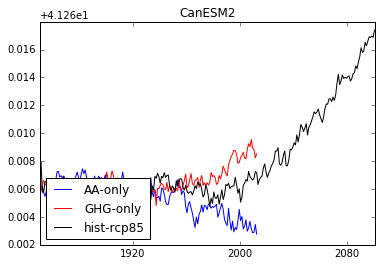

In [77]:
plot_metric('CanESM2', 'p4')

(40.6905, 40.695)


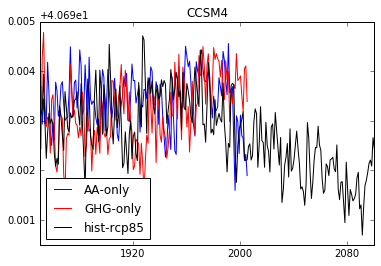

In [78]:
plot_metric('CCSM4', 'p10')

(40.805, 40.814999999999998)


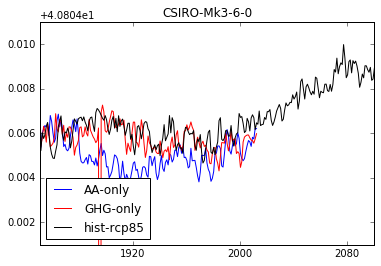

In [84]:
plot_metric('CSIRO-Mk3-6-0', 'p4', ylim=(40.805, 40.815))

(41.272000000000006, 41.278000000000006)


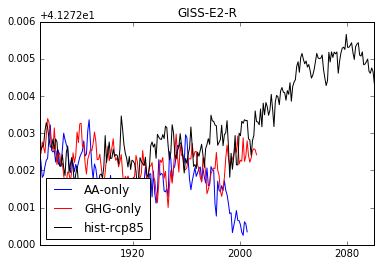

In [80]:
plot_metric('GISS-E2-R', 'p107')

(40.757999999999996, 40.771999999999998)


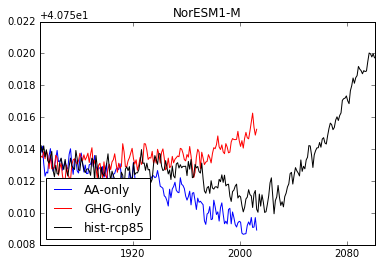

In [81]:
plot_metric('NorESM1-M', 'p1')